<a href="https://colab.research.google.com/github/jennyked/Berlin-Housing/blob/main/Berlin_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# The dataset:

The datasets contains information about rental appartments in Berlin. One row is for one appartment. The dataset contains 6 columns.


Region: is the Berlin district, where the flat is located

Condition: is the condition of the flat

Rooms: The number of rooms the flat has

Rent: Monthly rent for the flat

Year_Construction: The year in which the house was build

Space: How many square meters does the flat has?

In [4]:
import pandas as pd
import plotly.express as px
import matplotlib as plt


In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/juliandnl/redi_ss20/master/berlin_rental.csv")
df.head(5)

,Region,Condition,Rooms,Rent,Year_Construction,Space
0,Mitte,first_time_use,4.0,2659.00,2019,117.20
1,Kreuzberg,first_time_use,1.0,1200.00,2020,29.33
2,Köpenick,well_kept,2.0,979.00,1997,83.61
3,Wilmersdorf,well_kept,4.0,1830.22,1900,171.18
4,Kreuzberg,first_time_use,2.0,2272.00,2020,88.27


In [6]:
df.isnull().sum()

Region               0
Condition            0
Rooms                0
Rent                 0
Year_Construction    0
Space                0
dtype: int64

# Question

1.How many apartments are there in Mitte in a 'well-kept' condition?

In [7]:
mitte = (df['Region'] == 'Mitte') & (df['Condition'] == 'well_kept')
df.loc[mitte]

,Region,Condition,Rooms,Rent,Year_Construction,Space
15,Mitte,well_kept,2.0,1505.60,2018,75.28
272,Mitte,well_kept,3.0,1639.00,2014,96.00
392,Mitte,well_kept,1.0,924.44,2000,61.14
608,Mitte,well_kept,3.0,1800.00,2013,80.95
735,Mitte,well_kept,2.0,1350.00,2014,68.00
736,Mitte,well_kept,3.0,3500.00,2009,165.00


Conclusion

There are six(6) apartments in the Mitte region in well kept condition.*italicised text*

# **2**.How many apartments are there in Kreuzberg built before 1900?

In [8]:
kreu = (df['Region'] == 'Kreuzberg') & (df['Year_Construction'] < 1900)
df.loc[kreu]


,Region,Condition,Rooms,Rent,Year_Construction,Space
76,Kreuzberg,first_time_use,5.0,4400.0,1867,236.0
401,Kreuzberg,refurbished,4.0,2850.0,1895,127.0
697,Kreuzberg,first_time_use_after_refurbishment,2.0,1399.0,1874,50.0


In [9]:
df.loc[kreu].count()


Region               3
Condition            3
Rooms                3
Rent                 3
Year_Construction    3
Space                3
dtype: int64

Conclusion

There are three(3) apartments in Kreuzberg built before 1900



# 3. What are the average spaces of the apartments by the number of rooms?

In [11]:
average_num = df.groupby(['Rooms'])[['Space']].mean().round(1)
average_num

,Space
Rooms,
1.0,34.5
1.5,41.4
2.0,65.0
2.5,90.5
3.0,99.4
3.5,98.0
4.0,130.9
4.5,106.1
5.0,194.4


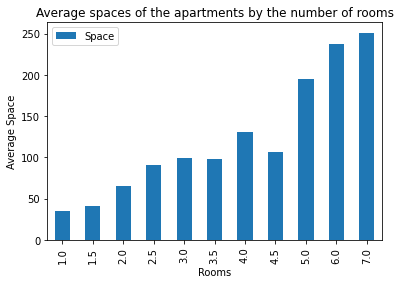

In [12]:
average_num.plot.bar(ylabel='Average Space', title = 'Average spaces of the apartments by the number of rooms')

Conclusion

Rooms with a higher number have bigger spaces when compared with rooms with smaller number.

# 3.Which is the most expensive region on average and what is the maximum rent for this region?

In [15]:
data = df.groupby(['Region'])[['Rent']].agg(['max', 'mean']).sort_values(by=[('Rent', 'max')], ascending=[False])
data


Rent             
                      max         mean
Region                                
Mitte            14207.00  2408.725033
Charlottenburg    9774.00  1753.452532
Kreuzberg         6450.00  2049.138085
Prenzlauer        5930.00  1996.962264
Wilmersdorf       5876.35  1748.646226
Tiergarten        4945.00  1914.824795
Neukölln          2295.00  1188.114915
Köpenick          2159.20  1125.475818
Friedrichsfelde   2138.68  1043.871731
Wedding           1949.26   847.138571

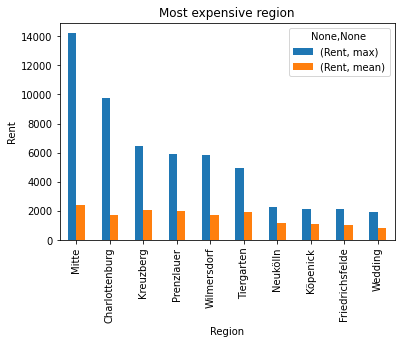

In [16]:
data.plot(kind='bar', title = 'Most expensive region',ylabel='Rent')


Conclusion

1. The most expensive region on average is the Mitte region
2. The maximum rent for the Mitte region is 14,207euros

# 4. What are the min, max and average number of rooms of the apartments in Köpenick?

In [17]:
koper = df[df['Region'] == 'Köpenick']
Kopenick= koper['Rooms'].agg(['min','max','mean']).round(1)
Kopenick

min     1.0
max     4.0
mean    2.3
Name: Rooms, dtype: float64

Conclusion

1. The minimum number of rooms is 1
2. The maximun number of rooms is 4
3. The average number of rooms is 2.3



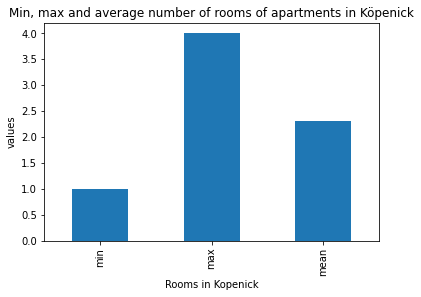

In [18]:
Kopenick.plot(kind='bar',title='Min, max and average number of rooms of apartments in Köpenick',ylabel='values',xlabel = 'Rooms in Kopenick')


# 5. What is the average price per square meter for different Regions?

In [20]:
def avg_price(x):
  return x.Rent / x.Space

In [21]:
df['Price_per_square'] = df.apply(avg_price, axis = 1)
df.head(2)

,Region,Condition,Rooms,Rent,Year_Construction,Space,Price_per_square
0,Mitte,first_time_use,4.0,2659.0,2019,117.20,22.687713
1,Kreuzberg,first_time_use,1.0,1200.0,2020,29.33,40.913740


In [22]:
avg_price_region = df.groupby('Region')[['Price_per_square']].mean().sort_values(['Price_per_square'], ascending = [False])
avg_price_region

,Price_per_square
Region,
Mitte,25.966819
Kreuzberg,23.333198
Wedding,22.811979
Prenzlauer,21.957957
Wilmersdorf,21.474912
Tiergarten,21.461178
Charlottenburg,21.394455
Neukölln,17.347237
Friedrichsfelde,16.094004


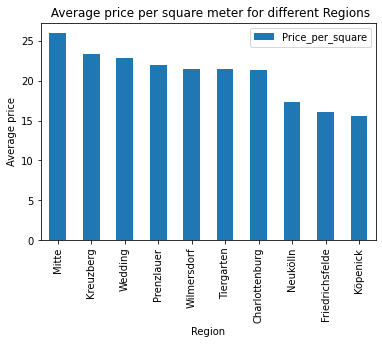

In [23]:
avg_price_region.plot.bar(ylabel = 'Average price', title = ' Average price per square meter for different Regions')

# 6.  Is there a difference of average room space (Space divided by Rooms) for apartments built after 2000 versus apartment built before 2000?

## 2. Is there a difference of average room space (Space divided by Rooms) for apartments built after 2000 versus apartment built before 2000?

In [24]:
df['Average_room_space'] = df['Space'] / df['Rooms']
df.head()

,Region,Condition,Rooms,Rent,Year_Construction,Space,Price_per_square,Average_room_space
0,Mitte,first_time_use,4.0,2659.00,2019,117.20,22.687713,29.300
1,Kreuzberg,first_time_use,1.0,1200.00,2020,29.33,40.913740,29.330
2,Köpenick,well_kept,2.0,979.00,1997,83.61,11.709126,41.805
3,Wilmersdorf,well_kept,4.0,1830.22,1900,171.18,10.691786,42.795
4,Kreuzberg,first_time_use,2.0,2272.00,2020,88.27,25.739209,44.135


In [25]:
after2000 = df.loc[df['Year_Construction'] > 2000]
a = round(after2000.Average_room_space.mean(), 1)
a

32.6

In [26]:
before2000 = df.loc[df['Year_Construction'] < 2000]
b = round(before2000.Average_room_space.mean(),1)
b


33.8

In [27]:
import matplotlib.pyplot as plt
import numpy as np

In [28]:

c=pd.DataFrame({'after2000':a, 'before2000':b}, index=['mean'])
c

,after2000,before2000
mean,32.6,33.8


## 7.What's the percentage of the apartments in high quality condition? In order to answer this question let's assume that high quality conditions are: first_time_use, mint_condition, refurbished, first_time_use_after_refurbishment and fully_renovated. The rest we can categorize as low quality condition.

In [29]:
 a = (df['Condition']=='first_time_use')| (df['Condition']=='mint_condition')|(df['Condition']=='refurbished')|(df['Condition']=='first_time_use_after_refurbishment')|(df['Condition']=='fully_renovated')

In [30]:
b = a.value_counts()
b

True     524
False    240
Name: Condition, dtype: int64

In [31]:
import matplotlib.pyplot as plt


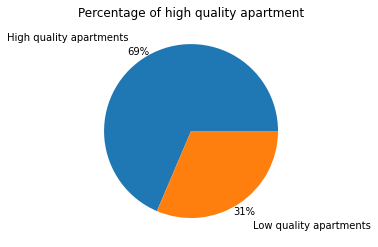

In [32]:
plt.pie(b, labels=['High quality apartments', 'Low quality apartments'], autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.3)
plt.title('Percentage of high quality apartment')
plt.ylabel(' ')
plt.show()

## For KPIs:  How many apartments where posted each month? 

In [33]:
from random import randrange
import datetime 
import numpy as np

In [34]:

df["posted_date"] = np.random.choice(pd.date_range('2020-01-01', '2020-12-31'), len(df))

## How many apartments where posted each month?

In [ ]:
posted=df[['posted_date']].groupby(df.posted_date.dt.month).agg('count')
posted

,posted_date
posted_date,
1,66
2,58
3,58
4,56
5,62
6,53
7,70
8,81
9,61
